#ARIMA AND SARIMA ON SEOSONAL DATA AND VECTOR AUTO REGRESSION

##TIME SERIES MODELS ARIMA AND SARIMA ON CHOCLATE DATA SET

Import Necessary libraries.

In [1]:

!pip install statsmodels==0.13.2

import pandas as pd
from pandas import datetime

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf

import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

from sklearn.metrics import mean_squared_error
from math import sqrt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """


Loading Choclate sales data set.

In [2]:
choclate_sales_data=pd.read_csv('Choclate_Sales.csv')

Understanding Choclate sales data set.

In [3]:
choclate_sales_data.head()

,Date,Choclate_Sales
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946


Setting index as Date and converting it into date time.

In [4]:
choclate_sales_data['Date'] = pd.to_datetime(choclate_sales_data['Date'])

In [5]:
choclate_sales_data=choclate_sales_data.set_index(choclate_sales_data['Date'])

In [6]:
choclate_sales_data.head()

,Date,Choclate_Sales
Date,,
1964-01-01,1964-01-01,2815
1964-02-01,1964-02-01,2672
1964-03-01,1964-03-01,2755
1964-04-01,1964-04-01,2721
1964-05-01,1964-05-01,2946


Drop all null values.

In [7]:
choclate_sales_data=choclate_sales_data.dropna()

Plot for choclate sales in millions

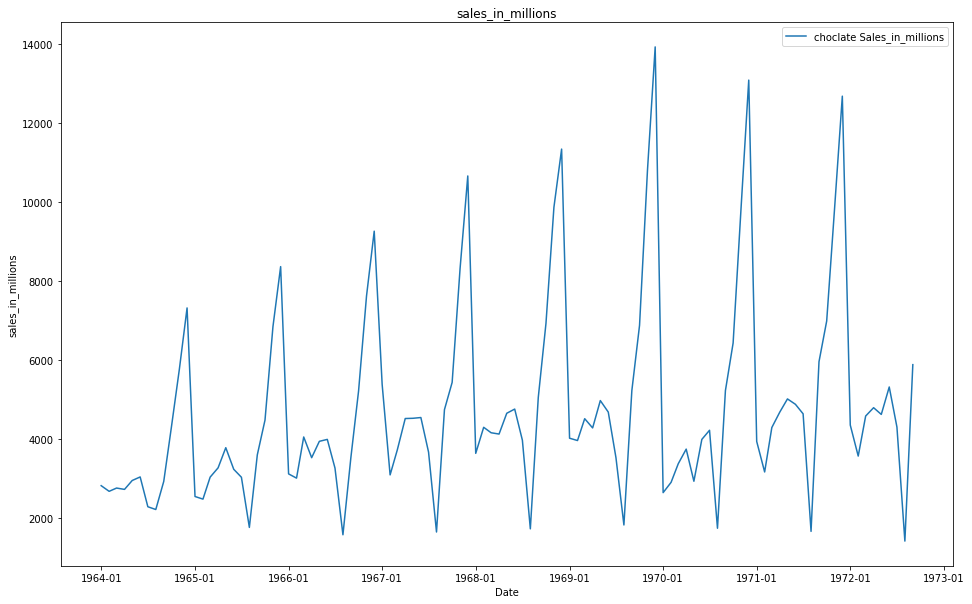

In [8]:
fig, ax = plt.subplots(figsize=(16,10))

ax.plot(choclate_sales_data['Date'], choclate_sales_data['Choclate_Sales'], label="choclate Sales_in_millions")


ax.set(xlabel="Date", ylabel="sales_in_millions",
       title="sales_in_millions")

#ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
ax.xaxis.set_major_formatter(DateFormatter("19%y-%m"))

plt.legend()
plt.show()

plot for choclate sales in millions from 1964 to 1967 to understand data in year

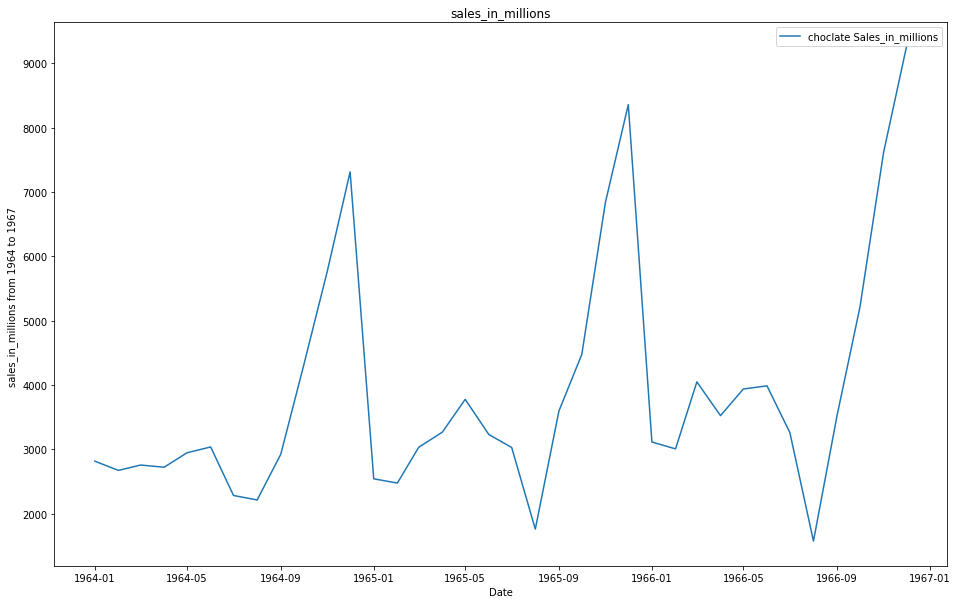

In [9]:
fig, ax = plt.subplots(figsize=(16,10))

ax.plot(choclate_sales_data['Date']['1964':'1966'], choclate_sales_data['Choclate_Sales']['1964':'1966'], label="choclate Sales_in_millions")


ax.set(xlabel="Date", ylabel="sales_in_millions from 1964 to 1967 ",
       title="sales_in_millions")

#ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
ax.xaxis.set_major_formatter(DateFormatter("19%y-%m"))

plt.legend()
plt.show()

plot for sales in millions with moving average window size 3 and 12

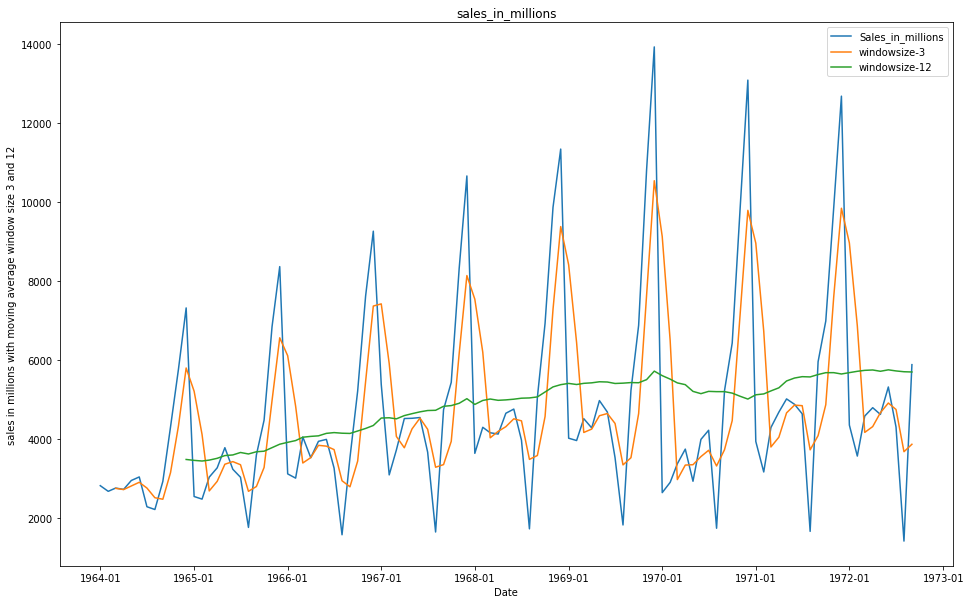

In [10]:
fig, ax = plt.subplots(figsize=(16,10))

ax.plot(choclate_sales_data['Date'], choclate_sales_data['Choclate_Sales'], label="Sales_in_millions")
ax.plot(choclate_sales_data['Date'], choclate_sales_data['Choclate_Sales'].rolling( window=3).mean(), label="windowsize-3")
ax.plot(choclate_sales_data['Date'], choclate_sales_data['Choclate_Sales'].rolling( window=12).mean(), label="windowsize-12")

ax.set(xlabel="Date", ylabel="sales in millions with moving average window size 3 and 12",
       title="sales_in_millions")

#ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
ax.xaxis.set_major_formatter(DateFormatter("19%y-%m"))
plt.legend()
plt.show()

pacf plot for choclate sales with rolling window size as 12.

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


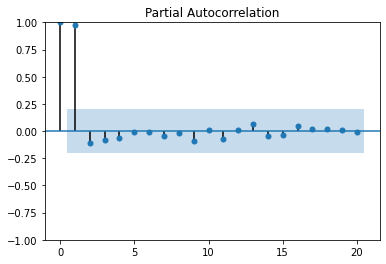

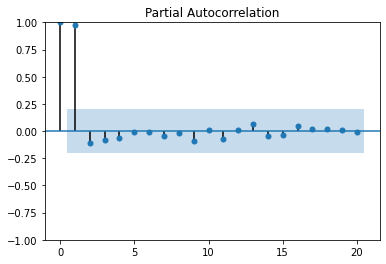

In [11]:
xt=choclate_sales_data['Choclate_Sales'].rolling( window=12).mean().dropna()
plot_pacf(xt)

plot for multiplicative seasonal decompose

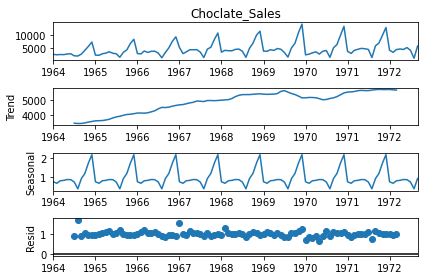

In [12]:
output = sm.tsa.seasonal_decompose(choclate_sales_data['Choclate_Sales'],period=12,model="multiplicative")
fig_multiplicative = output.plot()

plot for additive seasonal decompose

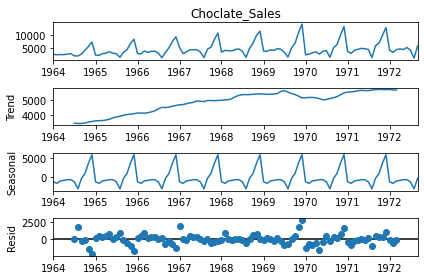

In [13]:
output_add= sm.tsa.seasonal_decompose(choclate_sales_data['Choclate_Sales'],period=12,model="additive")
fig_additive = output_add.plot()

calculating sesonal average for 12 months

In [14]:
choclate_sales_seosonal_average = choclate_sales_data.groupby([choclate_sales_data.index.year]).mean()

pacf plot for seasonal average

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


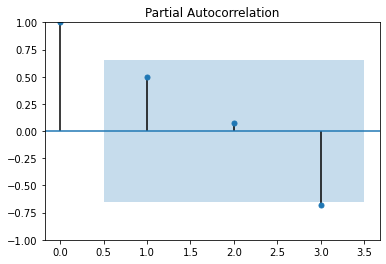

In [15]:
plot_pacf(choclate_sales_seosonal_average,lags=3);

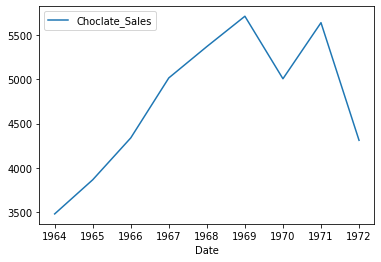

In [16]:
choclate_sales_seosonal_average.plot()

Dickey fuller test

In [17]:
#Ho: It is non stationary
#H1: It is stationary
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['p-value','#Lags Used']
    print(labels[0]+' : '+str(result[1])) 
    print(labels[1]+' : '+str(result[2]))
    if result[1] <= 0.05:
        print("Data has no unit root and is stationary")
    else:
        print("Data is non-stationary ")

Dickey fuller test for orginal dataset

In [18]:
adfuller_test(choclate_sales_data['Choclate_Sales'])

p-value : 0.363915771660247
#Lags Used : 11
Data is non-stationary 


Plot for 1st difference for choclate sales

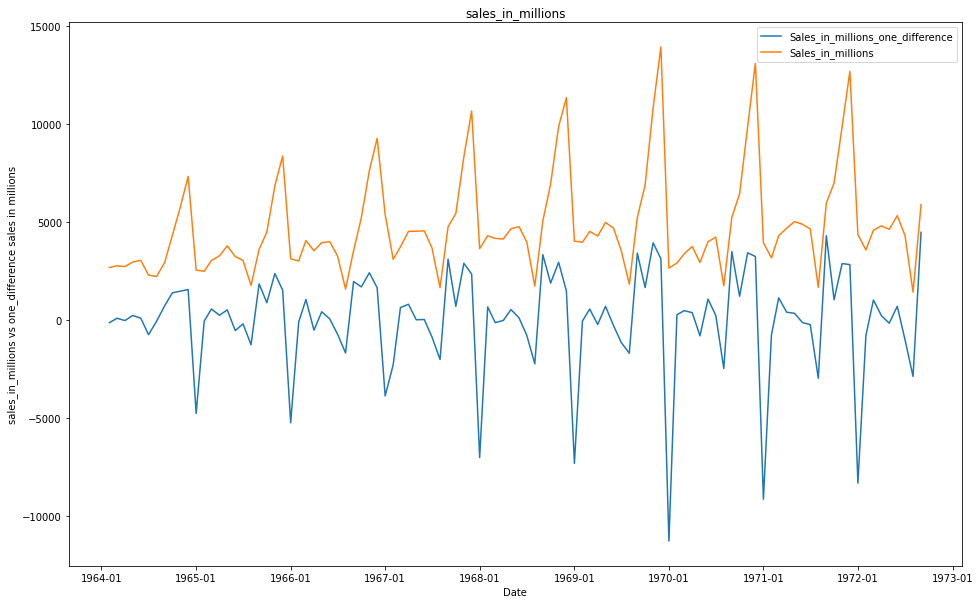

In [19]:
fig, ax = plt.subplots(figsize=(16,10))

ax.plot(choclate_sales_data['Date'][1:],choclate_sales_data['Choclate_Sales'].diff().dropna(), label="Sales_in_millions_one_difference")

ax.plot(choclate_sales_data['Date'][1:], choclate_sales_data['Choclate_Sales'][1:], label="Sales_in_millions")


ax.set(xlabel="Date", ylabel="sales_in_millions vs one_difference sales in millions",
       title="sales_in_millions")

#ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
ax.xaxis.set_major_formatter(DateFormatter("19%y-%m"))
plt.legend()
plt.show()

In [20]:
adfuller_test(choclate_sales_data['Choclate_Sales'].diff().dropna().dropna())

p-value : 2.519620447387081e-10
#Lags Used : 11
Data has no unit root and is stationary


Spliting the data to test and train

In [21]:
dup_choclate_data=choclate_sales_data
size = int(len(dup_choclate_data) * 0.80)

In [22]:
train, test = dup_choclate_data[0:size], dup_choclate_data[size:len(dup_choclate_data)]


pacf for training dataset with one difference

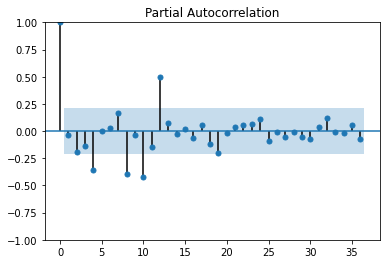

In [23]:
plot_pacf(train['Choclate_Sales'].diff().dropna(),lags=36,method='ywm');

Acf plot for choclate for one difference with 4,8,12,16 scale

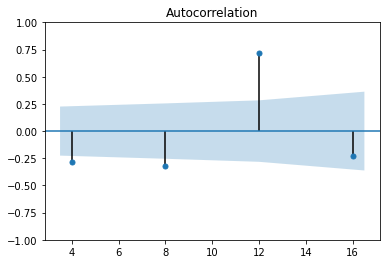

In [24]:
plot_acf(train['Choclate_Sales'].diff().dropna(),lags=[4,8,12,16]);

Acf plot for choclate for one difference with 12,24,36 scale

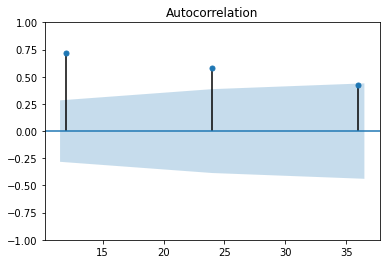

In [25]:
plot_acf(train['Choclate_Sales'].diff().dropna(),lags=[12,24,36]);

plotted pacf and acf  plots on log data with 1 difference to understand data.Nono important information found

setting index as date for test

In [26]:
test=test.set_index(test['Date'])

In [27]:
train_series=train['Choclate_Sales'].squeeze()
test_series=test['Choclate_Sales'].squeeze()
train_series_nd=train_series.values
test_series_nd=test_series.values

identifying p and q values based on lowest aic value for p(4) and q(4) combinations 

In [28]:
best_aic=0
flag=0
for p in range(4):
  for q in range(4):
    model = ARIMA(train_series, order=(p ,1, q))
    model_fit = model.fit()
    aic=model_fit.aic
    if((aic>=best_aic) & (flag==0)):
        best_aic=aic
        flag=1
        best_p=p
        best_q=q
    if((aic<best_aic) & (flag==1)):
      best_aic=aic
      best_p=p
      best_q=q
print('Best p and q combination for 1st difference arima model with low aic score')
print(f'best p value {best_p}')
print(f'best q value {best_q}')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dat

Best p and q combination for 1st difference arima model with low aic score
best p value 3
best q value 3


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [29]:
#by above output p=3 and q=3
model = ARIMA(train_series, order=(3 ,1, 3))
model_fit = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [30]:
forecast = model_fit.forecast(steps=21)
print(forecast)

1971-01-01    9058.386866
1971-02-01    4714.064332
1971-03-01    2589.389986
1971-04-01    1713.965706
1971-05-01    2505.223530
1971-06-01    3756.979106
1971-07-01    5243.936422
1971-08-01    6251.499297
1971-09-01    6795.980563
1971-10-01    6774.568354
1971-11-01    6456.942564
1971-12-01    5984.178085
1972-01-01    5581.065090
1972-02-01    5315.168609
1972-03-01    5234.645823
1972-04-01    5287.489956
1972-05-01    5422.182361
1972-06-01    5565.913668
1972-07-01    5678.528293
1972-08-01    5734.938787
1972-09-01    5740.055671
Freq: MS, Name: predicted_mean, dtype: float64


In [31]:
start = "1971-01-01"
end = "1972-09-01"
new_weeks=pd.date_range(start, end, freq='MS')
new_weeks

DatetimeIndex(['1971-01-01', '1971-02-01', '1971-03-01', '1971-04-01',
               '1971-05-01', '1971-06-01', '1971-07-01', '1971-08-01',
               '1971-09-01', '1971-10-01', '1971-11-01', '1971-12-01',
               '1972-01-01', '1972-02-01', '1972-03-01', '1972-04-01',
               '1972-05-01', '1972-06-01', '1972-07-01', '1972-08-01',
               '1972-09-01'],
              dtype='datetime64[ns]', freq='MS')

In [32]:
test_series

Date
1971-01-01     3934
1971-02-01     3162
1971-03-01     4286
1971-04-01     4676
1971-05-01     5010
1971-06-01     4874
1971-07-01     4633
1971-08-01     1659
1971-09-01     5951
1971-10-01     6981
1971-11-01     9851
1971-12-01    12670
1972-01-01     4348
1972-02-01     3564
1972-03-01     4577
1972-04-01     4788
1972-05-01     4618
1972-06-01     5312
1972-07-01     4298
1972-08-01     1413
1972-09-01     5877
Name: Choclate_Sales, dtype: int64

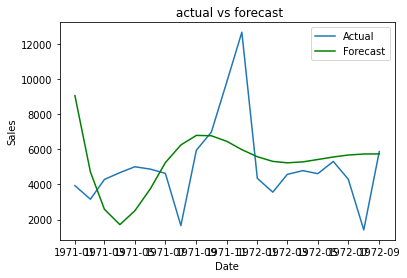

In [33]:
plt.plot(test_series, label="Actual")
plt.plot(new_weeks,forecast, color='green', label="Forecast")
plt.title(" actual vs forecast")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

In [34]:
rmse = sqrt(mean_squared_error(forecast, test_series))
print(rmse)
print('ARIMA(3,1,3) RMSE: %.2f' % rmse)

2698.0304589000175
ARIMA(3,1,3) RMSE: 2698.03


#### Implementation of SARIMA

Considering 2 seasons 12 months and 4 months
for 12 months below are pacf and acf plots

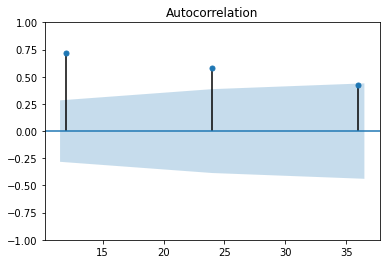

In [35]:
plot_acf(train['Choclate_Sales'].diff().dropna(),lags=[12,24,36]);

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


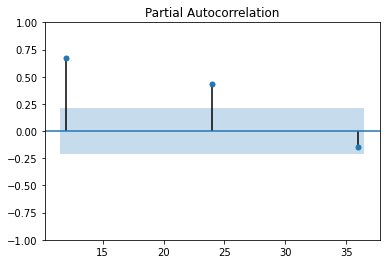

In [36]:
plot_pacf(train['Choclate_Sales'].diff().dropna(),lags=[12,24,36]);

from above plots considering p=2 and q=2 for seasanol order 12

In [37]:
model_sarima=sm.tsa.statespace.SARIMAX(train_series,order=(3, 1, 3),seasonal_order=(2,0,2,12))
result_sarima=model_sarima.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization f

In [38]:
forecast_sarima = result_sarima.forecast(steps=21)
print(forecast_sarima)

1971-01-01     4142.816256
1971-02-01     3850.772006
1971-03-01     4250.090705
1971-04-01     4248.090334
1971-05-01     3971.164830
1971-06-01     4447.504663
1971-07-01     4539.913665
1971-08-01     2515.877630
1971-09-01     5445.728632
1971-10-01     6363.176618
1971-11-01     9309.462009
1971-12-01    11732.190434
1972-01-01     4348.820337
1972-02-01     4084.143830
1972-03-01     4533.284592
1972-04-01     4462.727741
1972-05-01     4305.565106
1972-06-01     4639.195061
1972-07-01     4802.182737
1972-08-01     3006.430406
1972-09-01     5569.534639
Freq: MS, Name: predicted_mean, dtype: float64


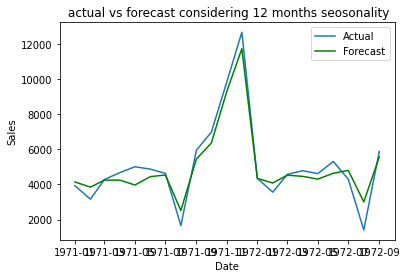

In [39]:
plt.plot(test_series, label="Actual")
plt.plot(new_weeks,forecast_sarima, color='green', label="Forecast")
plt.title(" actual vs forecast considering 12 months seosonality")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

In [40]:
rmse = sqrt(mean_squared_error(forecast_sarima, test_series))
print(rmse)
print('SRIMA(3,1,3,2,0,2,12) RMSE: %.2f' % rmse)

629.9071923819017
SRIMA(3,1,3,2,0,2,12) RMSE: 629.91


SARIMA FOR 4 months
pacf and acf plots

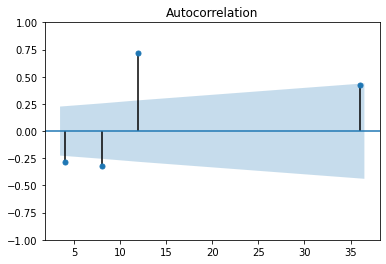

In [41]:
plot_acf(train['Choclate_Sales'].diff().dropna(),lags=[4,8,12,36]);

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


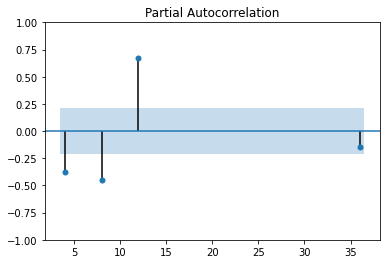

In [42]:
plot_pacf(train['Choclate_Sales'].diff().dropna(),lags=[4,8,12,36]);

from above plots considering p=3 and q=3 for 4 month seasonal arima

In [43]:
model_sarima=sm.tsa.statespace.SARIMAX(train_series,order=(3, 1, 3),seasonal_order=(3,0,3,4))
result_sarima=model_sarima.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [44]:
forecast_sarima = result_sarima.forecast(steps=21)

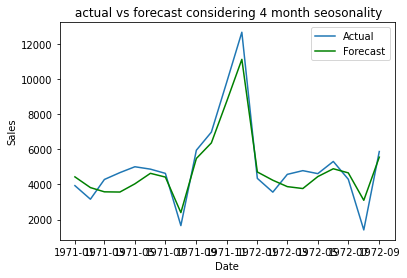

In [45]:
plt.plot(test_series, label="Actual")
plt.plot(new_weeks,forecast_sarima, color='green', label="Forecast")
plt.title(" actual vs forecast considering 4 month seosonality")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

In [46]:
rmse = sqrt(mean_squared_error(forecast_sarima, test_series))
print(rmse)
print('SRIMA(3,1,3,3,0,3,4) RMSE: %.2f' % rmse)

804.1211825891829
SRIMA(3,1,3,3,0,3,4) RMSE: 804.12


12 months sesanolity gave good results with low RMSE

In [47]:
#End-of-sarima and end of arima

## Implementation of vector auto regression

In [48]:
from statsmodels.tsa.stattools  import   grangercausalitytests

In [49]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from tqdm import tqdm_notebook
from itertools import product

Importing income vs spending data set

In [50]:
data_income_vs_spending=pd.read_csv('Income_vs_Spending.csv',parse_dates=True)
data_income_vs_spending=data_income_vs_spending.set_index(data_income_vs_spending['Date'])

In [51]:
data_income_vs_spending.head()

,Date,Spending,Income
Date,,,
01-01-1995,01-01-1995,4851.2,3492.4
02-01-1995,02-01-1995,4850.8,3489.9
03-01-1995,03-01-1995,4885.4,3491.1
04-01-1995,04-01-1995,4890.2,3499.2
05-01-1995,05-01-1995,4933.1,3524.2


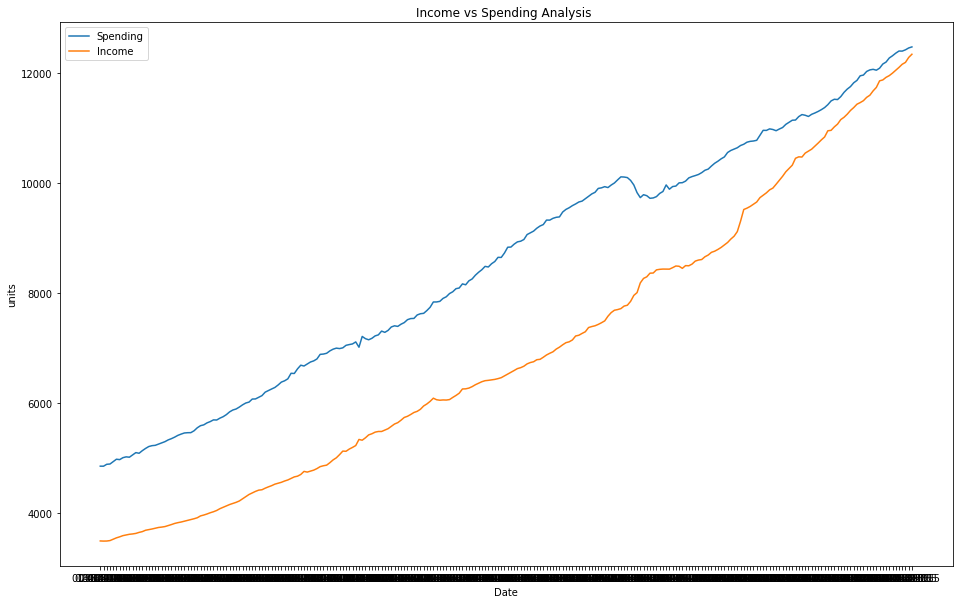

In [52]:
fig, ax = plt.subplots(figsize=(16,10))

ax.plot(data_income_vs_spending['Date'], data_income_vs_spending['Spending'], label="Spending")

ax.plot(data_income_vs_spending['Date'], data_income_vs_spending['Income'], label="Income")

ax.set(xlabel="Date", ylabel="units",
       title="Income vs Spending Analysis ")

#ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
#ax.xaxis.set_major_formatter(DateFormatter("%y-%m"))
plt.legend()
plt.show()

In [53]:
# Tests for stationarity

In [54]:
adfuller_test(data_income_vs_spending['Income'])

p-value : 1.0
#Lags Used : 4
Data is non-stationary 


In [55]:
adfuller_test(data_income_vs_spending['Spending'])

p-value : 0.9693009944428312
#Lags Used : 3
Data is non-stationary 


In [56]:
difference_1_Income=data_income_vs_spending['Income'].diff().dropna()
adfuller_test(difference_1_Income.diff().dropna())

p-value : 4.7606749312953e-10
#Lags Used : 14
Data has no unit root and is stationary


In [57]:
difference_1_Spending=data_income_vs_spending['Spending'].diff().dropna()
adfuller_test(difference_1_Spending.diff().dropna())

p-value : 2.6878999679871547e-14
#Lags Used : 8
Data has no unit root and is stationary


granger causality test whether spending cause Income?

In [58]:

granger_spending = grangercausalitytests(data_income_vs_spending[['Income','Spending']], 8)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6439  , p=0.4231  , df_denom=248, df_num=1
ssr based chi2 test:   chi2=0.6517  , p=0.4195  , df=1
likelihood ratio test: chi2=0.6509  , p=0.4198  , df=1
parameter F test:         F=0.6439  , p=0.4231  , df_denom=248, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.0760  , p=0.0479  , df_denom=245, df_num=2
ssr based chi2 test:   chi2=6.2776  , p=0.0433  , df=2
likelihood ratio test: chi2=6.2001  , p=0.0450  , df=2
parameter F test:         F=3.0760  , p=0.0479  , df_denom=245, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.2731  , p=0.0218  , df_denom=242, df_num=3
ssr based chi2 test:   chi2=10.1034 , p=0.0177  , df=3
likelihood ratio test: chi2=9.9038  , p=0.0194  , df=3
parameter F test:         F=3.2731  , p=0.0218  , df_denom=242, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.6203  , p=0.0357  

Test for Income granger  cause spending?

In [59]:

granger_spending = grangercausalitytests(data_income_vs_spending[['Spending', 'Income']], 8)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5856  , p=0.4448  , df_denom=248, df_num=1
ssr based chi2 test:   chi2=0.5927  , p=0.4414  , df=1
likelihood ratio test: chi2=0.5920  , p=0.4416  , df=1
parameter F test:         F=0.5856  , p=0.4448  , df_denom=248, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.6461  , p=0.5250  , df_denom=245, df_num=2
ssr based chi2 test:   chi2=1.3186  , p=0.5172  , df=2
likelihood ratio test: chi2=1.3151  , p=0.5181  , df=2
parameter F test:         F=0.6461  , p=0.5250  , df_denom=245, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.6772  , p=0.1725  , df_denom=242, df_num=3
ssr based chi2 test:   chi2=5.1771  , p=0.1593  , df=3
likelihood ratio test: chi2=5.1240  , p=0.1629  , df=3
parameter F test:         F=1.6772  , p=0.1725  , df_denom=242, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.5428  , p=0.1905  

Performing 2nd order differencing

In [60]:
income_vs_spend_diff1=data_income_vs_spending[['Income','Spending']].diff().dropna()
income_vs_spend_diff2=income_vs_spend_diff1.diff().dropna()

In [61]:
train_length=len(income_vs_spend_diff2)*0.95
test_length=len(income_vs_spend_diff2)*0.05
print(train_length)
print(test_length)

237.5
12.5


In [62]:
data_income_vs_spending.index

Index(['01-01-1995', '02-01-1995', '03-01-1995', '04-01-1995', '05-01-1995',
       '06-01-1995', '07-01-1995', '08-01-1995', '09-01-1995', '10-01-1995',
       ...
       '03-01-2015', '04-01-2015', '05-01-2015', '06-01-2015', '07-01-2015',
       '08-01-2015', '09-01-2015', '10-01-2015', '11-01-2015', '12-01-2015'],
      dtype='object', name='Date', length=252)

splititng data into test and train

In [63]:
train=income_vs_spend_diff2[:237]
test=data_income_vs_spending[239:]

In [64]:
train.head()
len(train)
len(test)

13

building var model

In [65]:
model_1 = VAR(train)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [66]:
sorted_order=model_1.select_order(maxlags=20)
print(sorted_order.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        14.89       14.92   2.924e+06       14.90
1        14.31       14.41   1.644e+06       14.35
2        14.09       14.24   1.313e+06       14.15
3        13.98      14.19*   1.173e+06       14.06
4        13.95       14.23   1.147e+06       14.07
5        13.91       14.25   1.101e+06      14.05*
6        13.92       14.32   1.109e+06       14.08
7        13.91       14.38   1.101e+06       14.10
8       13.85*       14.38  1.039e+06*       14.07
9        13.87       14.46   1.054e+06       14.11
10       13.90       14.55   1.088e+06       14.16
11       13.94       14.65   1.129e+06       14.22
12       13.96       14.74   1.163e+06       14.28
13       13.96       14.80   1.157e+06       14.30
14       13.99       14.89   1.196e+06       14.36
15       13.98       14.94   1.178e+06       14.37
16       13.98       15.01   1.

from above information considering lowest BIC value at lag p =3

In [67]:
train

,Income,Spending
Date,,
03-01-1995,3.7,35.0
04-01-1995,6.9,-29.8
05-01-1995,16.9,38.1
06-01-1995,-0.3,1.5
07-01-1995,-6.2,-51.7
...,...,...
07-01-2014,9.0,-25.1
08-01-2014,-31.9,40.3
09-01-2014,5.6,-70.7


In [68]:
var= VAR(train)
model_var = var.fit(3)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [69]:
print(model_var.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 26, Jun, 2022
Time:                     19:11:21
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    14.0573
Nobs:                     234.000    HQIC:                   13.9339
Log likelihood:          -2270.58    FPE:                1.03569e+06
AIC:                      13.8505    Det(Omega_mle):         976399.
--------------------------------------------------------------------
Results for equation Income
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.330041         1.817568            0.182           0.856
L1.Income          -0.605007         0.065226           -9.276           0.000
L1.Spending        -0.100599         0.049710           -2.024     

In [70]:
predicted_values = model_var.forecast(y=train.values[-8:],steps=13)
predicted_values

array([[ 8.93322304e+00,  1.95505315e+01],
       [-1.84502833e+00, -6.77706274e+00],
       [ 2.33948966e+00,  2.10265318e+00],
       [-3.10642115e+00, -1.02195474e+00],
       [ 2.26169256e+00,  7.78395148e-01],
       [-1.72608697e-01, -2.17363148e-01],
       [-2.63639703e-01,  6.26422272e-02],
       [ 3.53463989e-01,  1.76440563e-01],
       [ 2.36170176e-01, -2.94938810e-02],
       [ 1.76803407e-02,  9.60614628e-02],
       [ 1.75323691e-01,  7.90274864e-02],
       [ 1.84870234e-01,  5.49505755e-02],
       [ 1.10581592e-01,  6.00283336e-02]])

In [71]:
idx = pd.date_range(start='12-01-2014	',periods=13,freq='MS')
predictions = pd.DataFrame(predicted_values,index=idx,columns=['DF2_Spending','DF2_Income'])

In [72]:
predictions

,DF2_Spending,DF2_Income
2014-12-01,8.933223,19.550532
2015-01-01,-1.845028,-6.777063
2015-02-01,2.339490,2.102653
2015-03-01,-3.106421,-1.021955
2015-04-01,2.261693,0.778395
2015-05-01,-0.172609,-0.217363
2015-06-01,-0.263640,0.062642
2015-07-01,0.353464,0.176441
2015-08-01,0.236170,-0.029494
2015-09-01,0.017680,0.096061


Reverting back 2nd order differenced terms

In [73]:
predictions['DF1_Spending']= (data_income_vs_spending['Spending'][-14]-data_income_vs_spending['Spending'][-15])+predictions['DF2_Spending'].cumsum()
predictions['Spending_prediction'] = data_income_vs_spending['Spending'][-14]+ predictions['DF1_Spending'].cumsum()

In [74]:
predictions['DF1_Income']= (data_income_vs_spending['Income'][-14]-data_income_vs_spending['Income'][-15])+predictions['DF2_Income'].cumsum()
predictions['Income_prediction'] = data_income_vs_spending['Income'][-14]+ predictions['DF1_Income'].cumsum()

In [75]:
test

,Date,Spending,Income
Date,,,
12-01-2014,12-01-2014,12062.0,11670.1
01-01-2015,01-01-2015,12046.0,11733.2
02-01-2015,02-01-2015,12082.4,11852.4
03-01-2015,03-01-2015,12158.3,11868.8
04-01-2015,04-01-2015,12193.8,11916.1
05-01-2015,05-01-2015,12268.1,11947.6
06-01-2015,06-01-2015,12308.3,11993.1
07-01-2015,07-01-2015,12355.4,12045.3
08-01-2015,08-01-2015,12394.0,12096.8


In [76]:
predictions.index=test.index

In [77]:
predictions

,DF2_Spending,DF2_Income,DF1_Spending,Spending_prediction,DF1_Income,Income_prediction
Date,,,,,,
12-01-2014,8.933223,19.550532,37.333223,12088.733223,58.650532,11650.150532
01-01-2015,-1.845028,-6.777063,35.488195,12124.221418,51.873469,11702.024000
02-01-2015,2.339490,2.102653,37.827684,12162.049102,53.976122,11756.000122
03-01-2015,-3.106421,-1.021955,34.721263,12196.770365,52.954167,11808.954290
04-01-2015,2.261693,0.778395,36.982956,12233.753321,53.732562,11862.686852
05-01-2015,-0.172609,-0.217363,36.810347,12270.563668,53.515199,11916.202051
06-01-2015,-0.263640,0.062642,36.546707,12307.110376,53.577841,11969.779893
07-01-2015,0.353464,0.176441,36.900171,12344.010547,53.754282,12023.534175
08-01-2015,0.236170,-0.029494,37.136342,12381.146889,53.724788,12077.258963


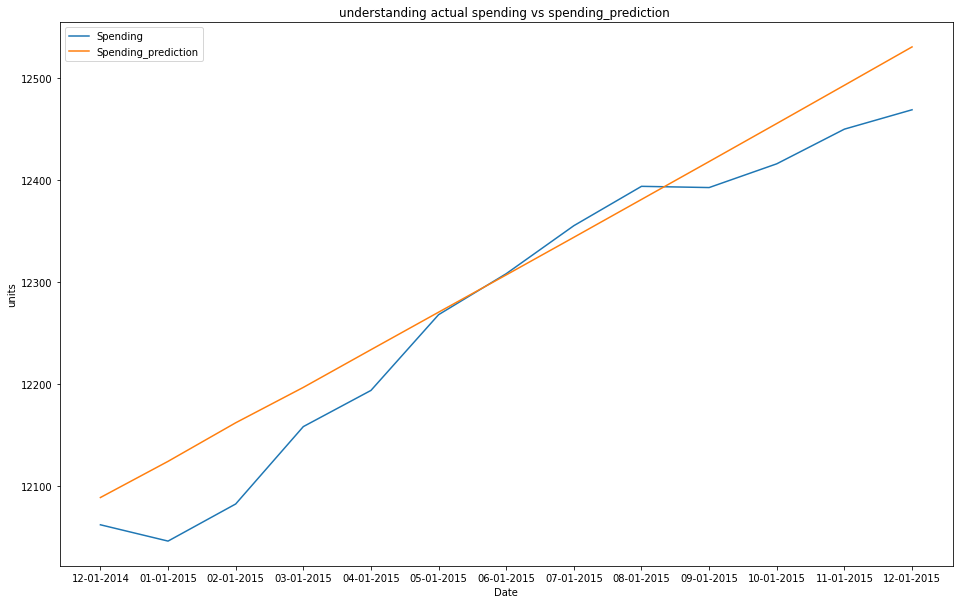

In [78]:
fig, ax = plt.subplots(figsize=(16,10))

ax.plot(predictions.index,test['Spending'], label="Spending")

ax.plot(predictions.index, predictions['Spending_prediction'], label="Spending_prediction")


ax.set(xlabel="Date", ylabel="units",
       title="understanding actual spending vs spending_prediction ")

#ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
#ax.xaxis.set_major_formatter(DateFormatter("%y-%m"))
plt.legend()
plt.show()

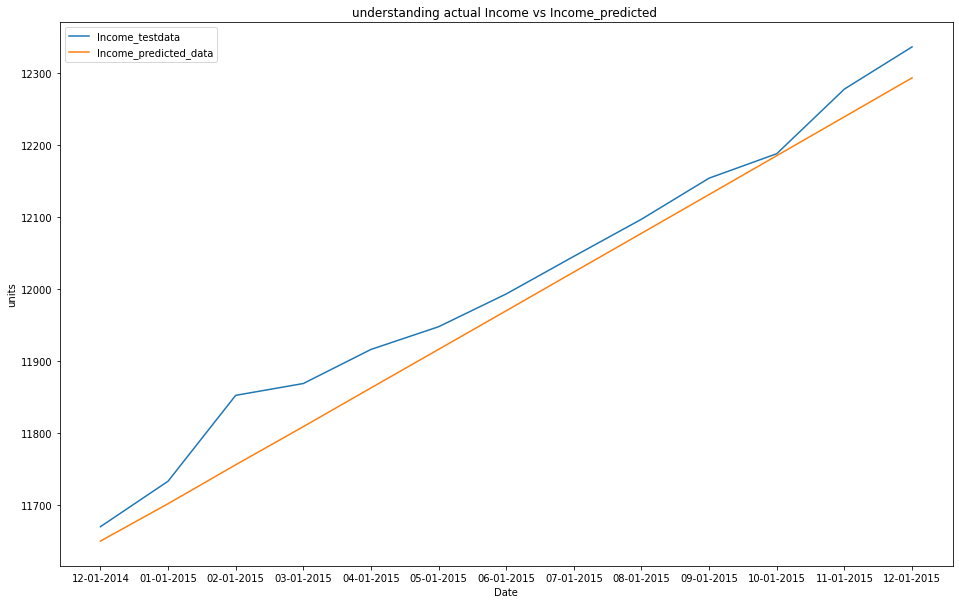

In [79]:
fig, ax = plt.subplots(figsize=(16,10))

ax.plot(predictions.index,test['Income'], label="Income_testdata")

ax.plot(predictions.index, predictions['Income_prediction'], label="Income_predicted_data")


ax.set(xlabel="Date", ylabel="units",
       title="understanding actual Income vs Income_predicted ")

#ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
#ax.xaxis.set_major_formatter(DateFormatter("%y-%m"))
plt.legend()
plt.show()

In [80]:
rmse = sqrt(mean_squared_error(test['Income'], predictions['Income_prediction']))
print(rmse)
print('Income predictions RMSE: %.2f' % rmse)

42.36340280152077
Income predictions RMSE: 42.36


In [81]:
rmse = sqrt(mean_squared_error(test['Spending'], predictions['Spending_prediction']))
print(rmse)
print('Spending predictions RMSE: %.2f' % rmse)

43.34542973530263
Spending predictions RMSE: 43.35


Based on my analysis based on granger causality test which was performed for 3 lags I came to conclusion that Chi square test result for income granger cause spending p value is greater than 0.05 at lag 3 so that means it rejects null hypothesis of alpha=0 and concludes there is dependency of income for predicting spending and. For spending granger cause income test p values at lag 3 is less than 0.05 accepting null hypothesis “spending does not granger cause income” so spending does not have much impact in income prediction.